In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

# Classification models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    BaggingClassifier,
    VotingClassifier,
    StackingClassifier
)
from sklearn.cluster import KMeans

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For notebook display
from IPython.display import display

In [2]:
# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [3]:
print(f"Dataset shape: {X.shape}")
print(f"Feature names: {feature_names}")
print(f"Target classes: {target_names}")

Dataset shape: (150, 4)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']


In [4]:
iris_df = pd.DataFrame(X, columns=feature_names)
iris_df['species'] = pd.Categorical.from_codes(y, target_names)

In [5]:
print("\nFirst few rows of the dataset:")
display(iris_df.head())


First few rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Text(0.5, 1.0, 'Petal Features')

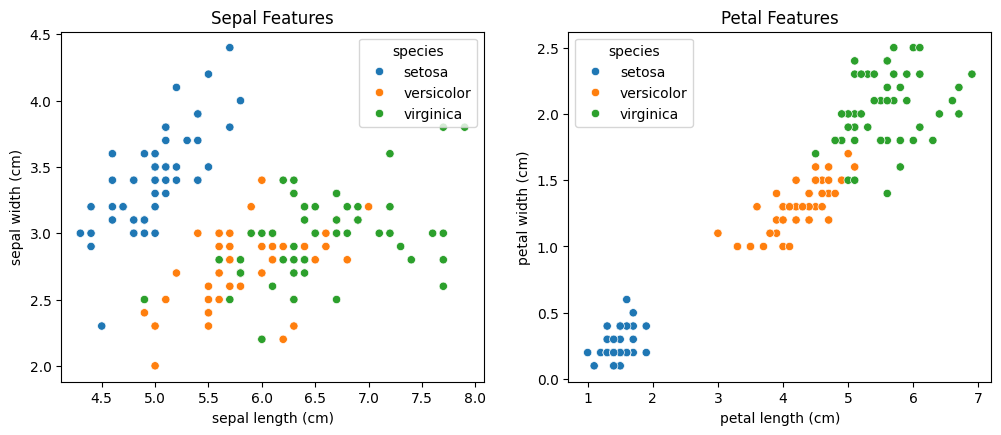

In [6]:
plt.figure(figsize=(12, 10))

# Scatter plot matrix
plt.subplot(2, 2, 1)
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)',
                hue='species', data=iris_df)
plt.title('Sepal Features')

plt.subplot(2, 2, 2)
sns.scatterplot(x='petal length (cm)', y='petal width (cm)',
                hue='species', data=iris_df)
plt.title('Petal Features')


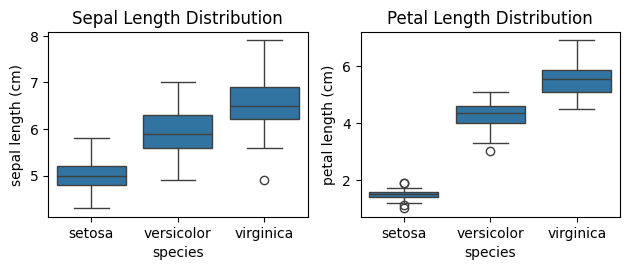

In [7]:
plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='sepal length (cm)', data=iris_df)
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='petal length (cm)', data=iris_df)
plt.title('Petal Length Distribution')

plt.tight_layout()
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (112, 4)
Testing set shape: (38, 4)


In [11]:
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap,
                xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

In [12]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"\n--- {model_name} Results ---")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))

    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, classes=target_names,
                         title=f'Confusion Matrix - {model_name}')

    return accuracy, y_pred

results = {}

# SVM

In [13]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42))
])

In [14]:
svm_param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto', 0.1]
}


In [15]:
svm_grid = GridSearchCV(
    svm_pipeline, svm_param_grid, cv=5,
    scoring='accuracy', n_jobs=-1, verbose=1
)

svm_grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC(random_state=42))]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 1, 10],
                         'svm__gamma': ['scale', 'auto', 0.1],
                         'svm__kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=1)


Best parameters: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best cross-validation score: 0.9549

--- SVM (tuned) Results ---
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



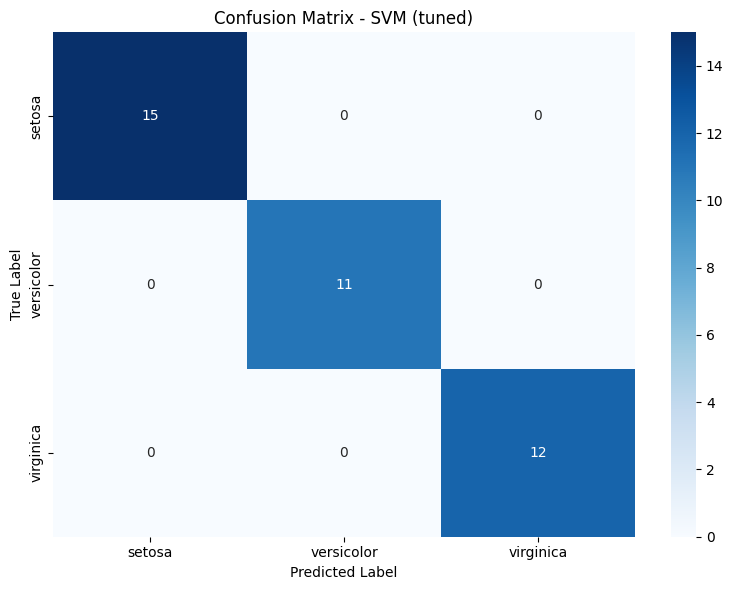

In [16]:
print(f"\nBest parameters: {svm_grid.best_params_}")
print(f"Best cross-validation score: {svm_grid.best_score_:.4f}")

# Evaluate the model
svm_accuracy, svm_preds = evaluate_model(
    svm_grid, X_test, y_test, "SVM (tuned)"
)

# Store results
results['SVM'] = svm_accuracy

# KNN

Fitting 5 folds for each of 80 candidates, totalling 400 fits

Best parameters: {'knn__metric': 'euclidean', 'knn__n_neighbors': 9, 'knn__weights': 'distance'}
Best cross-validation score: 0.9549

--- KNN (tuned) Results ---
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



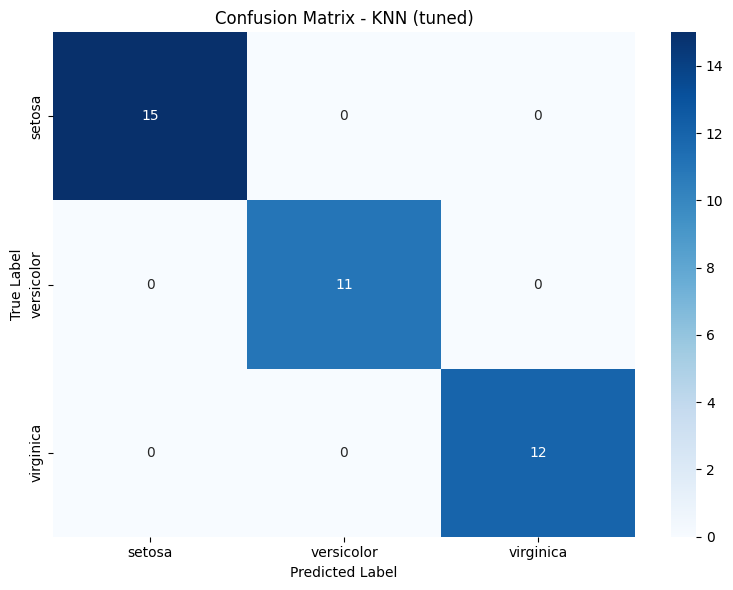

In [17]:
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Define hyperparameters to tune
knn_param_grid = {
    'knn__n_neighbors': range(1, 21),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

# Setup GridSearchCV
knn_grid = GridSearchCV(
    knn_pipeline, knn_param_grid, cv=5,
    scoring='accuracy', n_jobs=-1, verbose=1
)

# Fit the model
knn_grid.fit(X_train, y_train)

# Best parameters and score
print(f"\nBest parameters: {knn_grid.best_params_}")
print(f"Best cross-validation score: {knn_grid.best_score_:.4f}")

# Evaluate the model
knn_accuracy, knn_preds = evaluate_model(
    knn_grid, X_test, y_test, "KNN (tuned)"
)

# Store results
results['KNN'] = knn_accuracy

# Logistic Regression

Fitting 5 folds for each of 45 candidates, totalling 225 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **l


Best parameters: {'lr__C': 1, 'lr__multi_class': 'auto', 'lr__solver': 'lbfgs'}
Best cross-validation score: 0.9549

--- Logistic Regression (tuned) Results ---
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



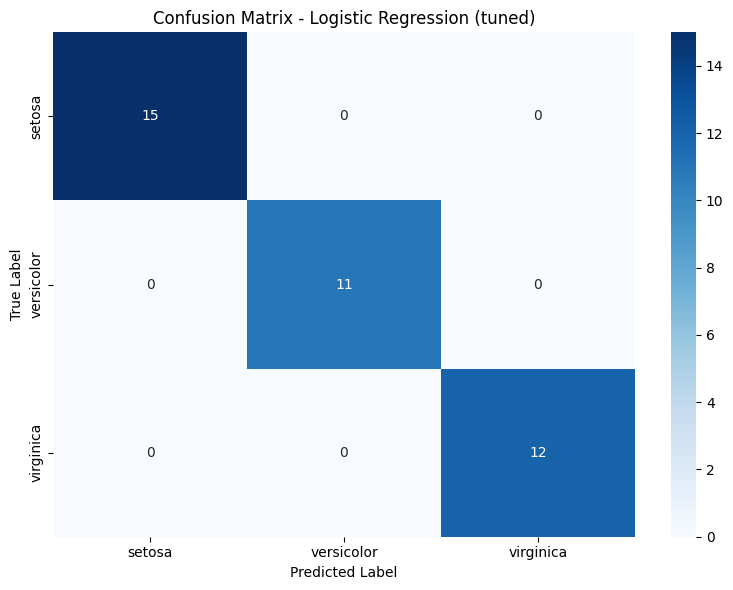

In [18]:
# Create a pipeline with scaling
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42, max_iter=1000))
])

# Define hyperparameters to tune
lr_param_grid = {
    'lr__C': [0.01, 0.1, 1, 10, 100],
    'lr__solver': ['lbfgs', 'liblinear', 'newton-cg'],
    'lr__multi_class': ['auto', 'ovr', 'multinomial']
}

# Setup GridSearchCV
lr_grid = GridSearchCV(
    lr_pipeline, lr_param_grid, cv=5,
    scoring='accuracy', n_jobs=-1, verbose=1
)

# Fit the model
lr_grid.fit(X_train, y_train)

# Best parameters and score
print(f"\nBest parameters: {lr_grid.best_params_}")
print(f"Best cross-validation score: {lr_grid.best_score_:.4f}")

# Evaluate the model
lr_accuracy, lr_preds = evaluate_model(
    lr_grid, X_test, y_test, "Logistic Regression (tuned)"
)

# Store results
results['Logistic Regression'] = lr_accuracy

# Decision Tree

Fitting 5 folds for each of 72 candidates, totalling 360 fits

Best parameters: {'dt__criterion': 'entropy', 'dt__max_depth': None, 'dt__min_samples_leaf': 4, 'dt__min_samples_split': 2}
Best cross-validation score: 0.9545

--- Decision Tree (tuned) Results ---
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



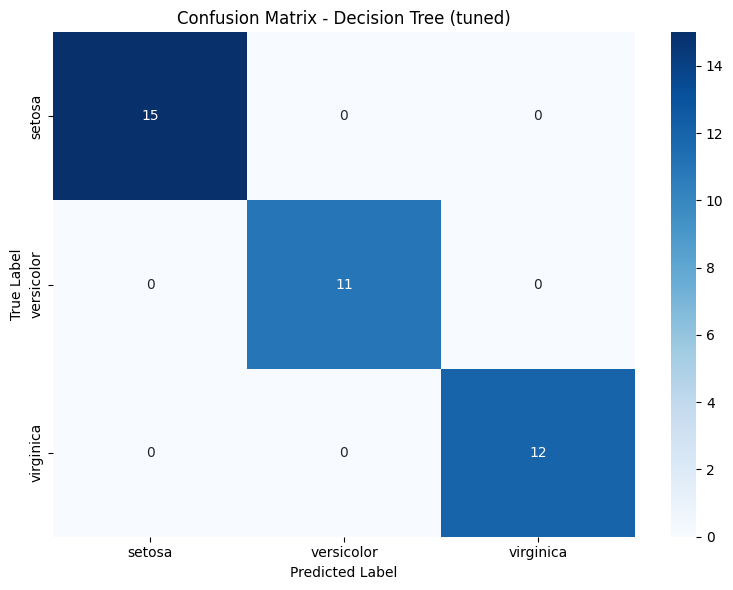

In [19]:
# Create a pipeline
dt_pipeline = Pipeline([
    ('dt', DecisionTreeClassifier(random_state=42))
])

# Define hyperparameters to tune
dt_param_grid = {
    'dt__max_depth': [None, 3, 5, 10],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4],
    'dt__criterion': ['gini', 'entropy']
}

# Setup GridSearchCV
dt_grid = GridSearchCV(
    dt_pipeline, dt_param_grid, cv=5,
    scoring='accuracy', n_jobs=-1, verbose=1
)

# Fit the model
dt_grid.fit(X_train, y_train)

# Best parameters and score
print(f"\nBest parameters: {dt_grid.best_params_}")
print(f"Best cross-validation score: {dt_grid.best_score_:.4f}")

# Evaluate the model
dt_accuracy, dt_preds = evaluate_model(
    dt_grid, X_test, y_test, "Decision Tree (tuned)"
)

# Store results
results['Decision Tree'] = dt_accuracy


# Random forest

Fitting 5 folds for each of 81 candidates, totalling 405 fits

Best parameters: {'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 10, 'rf__n_estimators': 50}
Best cross-validation score: 0.9549

--- Random Forest (tuned) Results ---
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



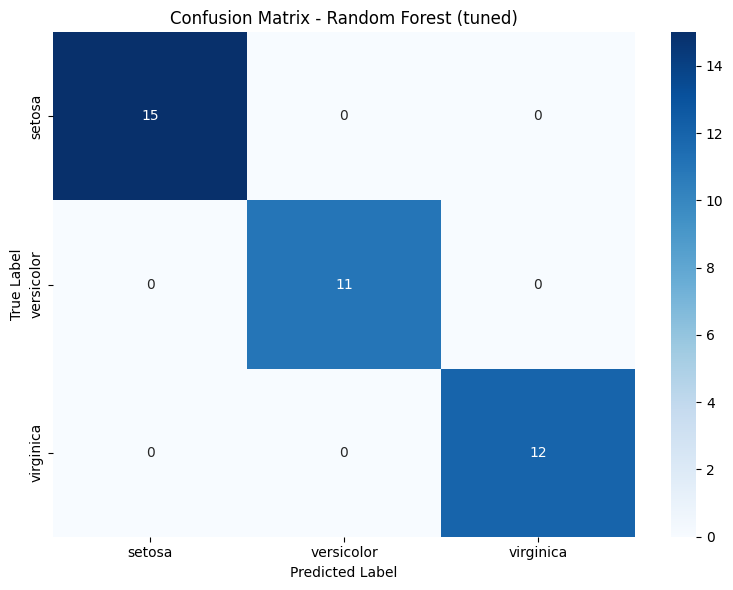

In [20]:
# Create a pipeline
rf_pipeline = Pipeline([
    ('rf', RandomForestClassifier(random_state=42))
])

# Define hyperparameters to tune
rf_param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

# Setup GridSearchCV
rf_grid = GridSearchCV(
    rf_pipeline, rf_param_grid, cv=5,
    scoring='accuracy', n_jobs=-1, verbose=1
)

# Fit the model
rf_grid.fit(X_train, y_train)

# Best parameters and score
print(f"\nBest parameters: {rf_grid.best_params_}")
print(f"Best cross-validation score: {rf_grid.best_score_:.4f}")

# Evaluate the model
rf_accuracy, rf_preds = evaluate_model(
    rf_grid, X_test, y_test, "Random Forest (tuned)"
)

# Store results
results['Random Forest'] = rf_accuracy

Fitting 5 folds for each of 18 candidates, totalling 90 fits

Best parameters: {'kmeans__init': 'k-means++', 'kmeans__n_clusters': 3, 'kmeans__n_init': 10}
Best cross-validation score: 0.5949

K-Means clustering accuracy: 0.8421


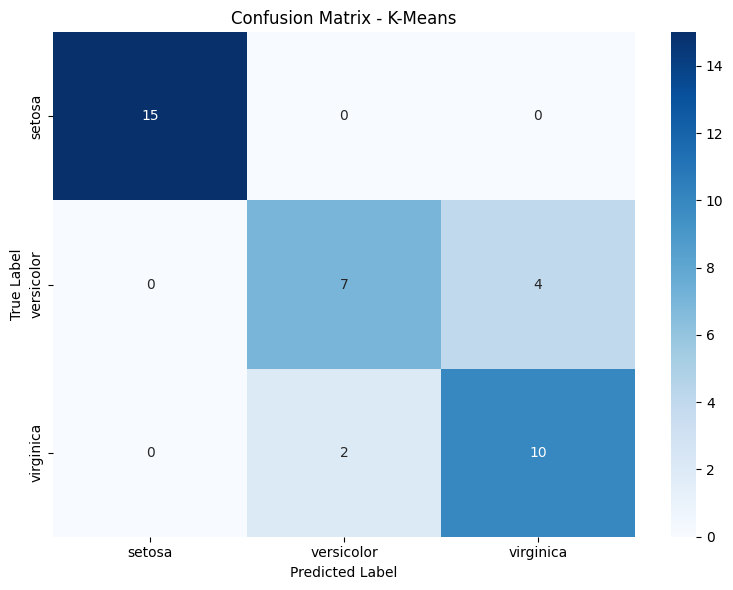

In [21]:
# Create a pipeline with scaling
kmeans_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(random_state=42))
])

# Define hyperparameters to tune
kmeans_param_grid = {
    'kmeans__n_clusters': [3, 4, 5],  # We know there are 3 classes
    'kmeans__init': ['k-means++', 'random'],
    'kmeans__n_init': [10, 15, 20]
}

# Setup GridSearchCV
kmeans_grid = GridSearchCV(
    kmeans_pipeline, kmeans_param_grid, cv=5,
    scoring='adjusted_rand_score', n_jobs=-1, verbose=1
)

# Fit the model
kmeans_grid.fit(X_train, y_train)

# Best parameters and score
print(f"\nBest parameters: {kmeans_grid.best_params_}")
print(f"Best cross-validation score: {kmeans_grid.best_score_:.4f}")

# For KMeans, we need to map cluster labels to actual classes
kmeans_preds = kmeans_grid.predict(X_test)

# We'll use a simple mapping based on majority class in each cluster
clusters = kmeans_grid.predict(X_train)
mapping = {}
for cluster in np.unique(clusters):
    # Find the most common class in this cluster
    cluster_labels = y_train[clusters == cluster]
    most_common = np.bincount(cluster_labels).argmax()
    mapping[cluster] = most_common

# Apply mapping to predictions
kmeans_mapped_preds = np.array([mapping[cluster] for cluster in kmeans_preds])

# Calculate accuracy
kmeans_accuracy = accuracy_score(y_test, kmeans_mapped_preds)
print(f"\nK-Means clustering accuracy: {kmeans_accuracy:.4f}")

# Create confusion matrix
cm = confusion_matrix(y_test, kmeans_mapped_preds)
plot_confusion_matrix(cm, classes=target_names, title='Confusion Matrix - K-Means')

# Store results
results['K-Means'] = kmeans_accuracy

# Ensemble Methods

#### Bagging

Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best parameters: {'bagging__max_features': 1.0, 'bagging__max_samples': 0.5, 'bagging__n_estimators': 50}
Best cross-validation score: 0.9549

--- Bagging Classifier Results ---
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



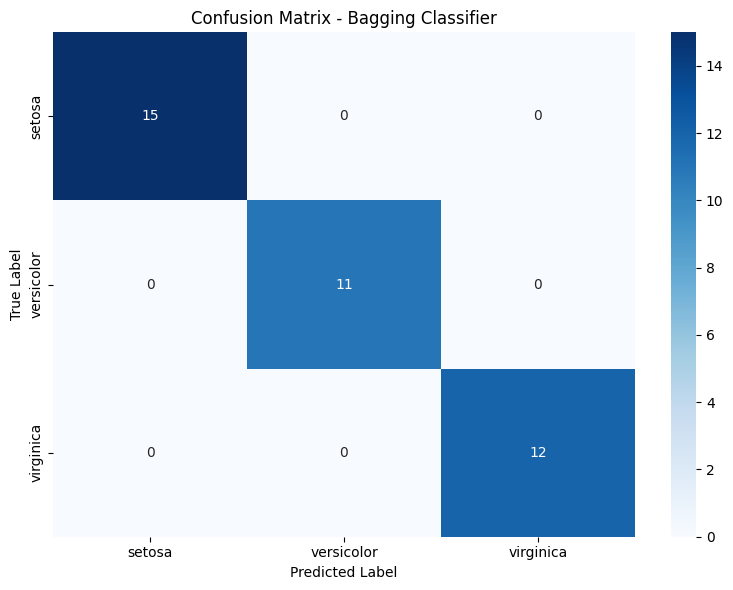

In [22]:

# Create a pipeline
bagging_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('bagging', BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=42),
        random_state=42))
])

# Define hyperparameters to tune
bagging_param_grid = {
    'bagging__n_estimators': [10, 50, 100],
    'bagging__max_samples': [0.5, 0.7, 1.0],
    'bagging__max_features': [0.5, 0.7, 1.0]
}

# Setup GridSearchCV
bagging_grid = GridSearchCV(
    bagging_pipeline, bagging_param_grid, cv=5,
    scoring='accuracy', n_jobs=-1, verbose=1
)

# Fit the model
bagging_grid.fit(X_train, y_train)

# Best parameters and score
print(f"\nBest parameters: {bagging_grid.best_params_}")
print(f"Best cross-validation score: {bagging_grid.best_score_:.4f}")

# Evaluate the model
bagging_accuracy, bagging_preds = evaluate_model(
    bagging_grid, X_test, y_test, "Bagging Classifier"
)

# Store results
results['Bagging'] = bagging_accuracy

### AdaBoosting

Fitting 5 folds for each of 9 candidates, totalling 45 fits

Best parameters: {'adaboost__learning_rate': 0.1, 'adaboost__n_estimators': 100}
Best cross-validation score: 0.9549

--- AdaBoost Classifier Results ---
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



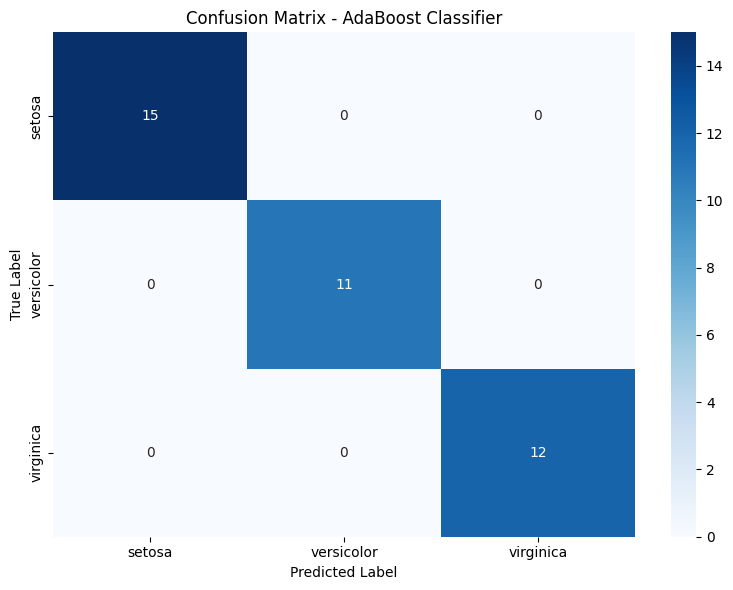

In [23]:
adaboost_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('adaboost', AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
        random_state=42))
])

# Define hyperparameters to tune
adaboost_param_grid = {
    'adaboost__n_estimators': [50, 100, 200],
    'adaboost__learning_rate': [0.01, 0.1, 1.0]
}

# Setup GridSearchCV
adaboost_grid = GridSearchCV(
    adaboost_pipeline, adaboost_param_grid, cv=5,
    scoring='accuracy', n_jobs=-1, verbose=1
)

# Fit the model
adaboost_grid.fit(X_train, y_train)

# Best parameters and score
print(f"\nBest parameters: {adaboost_grid.best_params_}")
print(f"Best cross-validation score: {adaboost_grid.best_score_:.4f}")

# Evaluate the model
adaboost_accuracy, adaboost_preds = evaluate_model(
    adaboost_grid, X_test, y_test, "AdaBoost Classifier"
)

# Store results
results['AdaBoost'] = adaboost_accuracy

### Gradient Boosting

Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best parameters: {'gb__learning_rate': 0.01, 'gb__max_depth': 3, 'gb__n_estimators': 200}
Best cross-validation score: 0.9458

--- Gradient Boosting Classifier Results ---
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



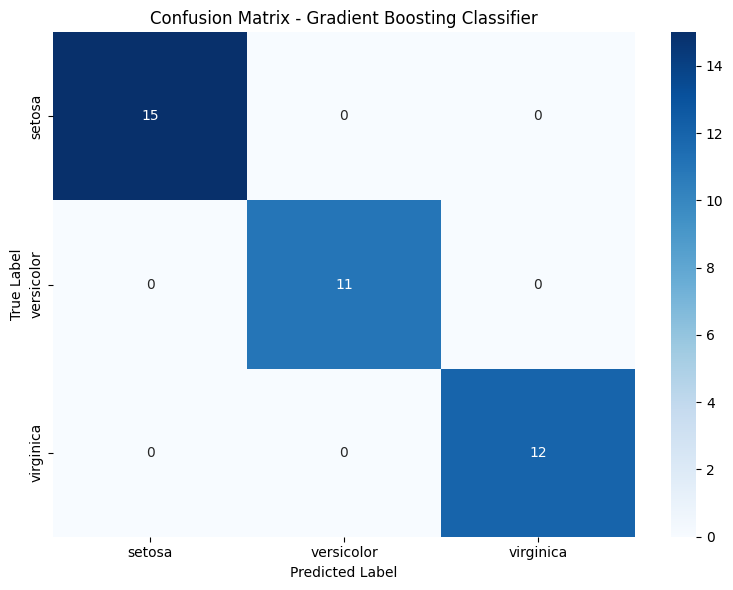

In [24]:
gb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingClassifier(random_state=42))
])

# Define hyperparameters to tune
gb_param_grid = {
    'gb__n_estimators': [50, 100, 200],
    'gb__learning_rate': [0.01, 0.1, 0.2],
    'gb__max_depth': [3, 5, 7]
}

# Setup GridSearchCV
gb_grid = GridSearchCV(
    gb_pipeline, gb_param_grid, cv=5,
    scoring='accuracy', n_jobs=-1, verbose=1
)

# Fit the model
gb_grid.fit(X_train, y_train)

# Best parameters and score
print(f"\nBest parameters: {gb_grid.best_params_}")
print(f"Best cross-validation score: {gb_grid.best_score_:.4f}")

# Evaluate the model
gb_accuracy, gb_preds = evaluate_model(
    gb_grid, X_test, y_test, "Gradient Boosting Classifier"
)

# Store results
results['Gradient Boosting'] = gb_accuracy

### Voting


--- Voting Classifier Results ---
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



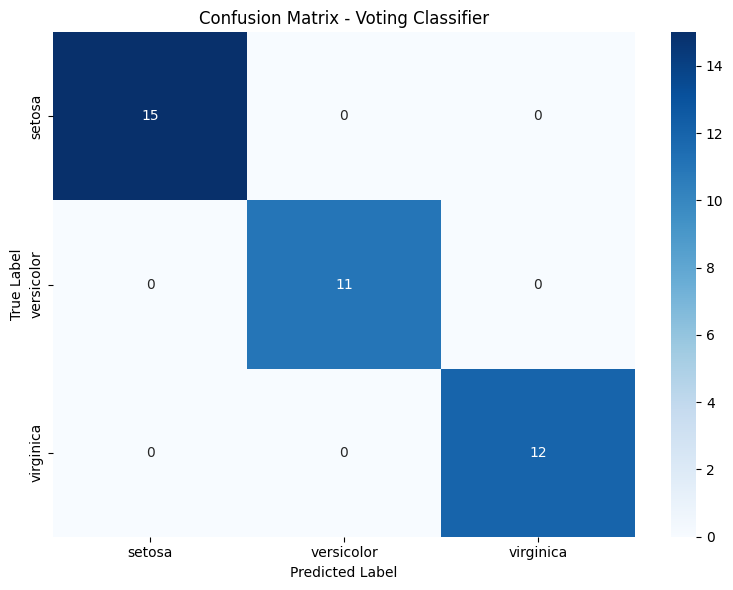

In [25]:
svm_estimator = svm_grid.best_estimator_.named_steps['svm']
rf_estimator = rf_grid.best_estimator_.named_steps['rf']
gb_estimator = gb_grid.best_estimator_.named_steps['gb']

# Make sure SVM supports probability estimates
if hasattr(svm_estimator, 'probability') and not svm_estimator.probability:
    svm_estimator.probability = True
    svm_estimator.fit(X_train_scaled, y_train)

# Create a voting classifier with the base estimators
voting_clf = VotingClassifier(
    estimators=[
        ('svm', svm_estimator),
        ('rf', rf_estimator),
        ('gb', gb_estimator)
    ],
    voting='soft'
)

# Fit the model using scaled data
voting_clf.fit(X_train_scaled, y_train)

# Evaluate the model
voting_accuracy, voting_preds = evaluate_model(
    voting_clf, X_test_scaled, y_test, "Voting Classifier"
)

# Store results
results['Voting'] = voting_accuracy

### Stacking


--- Stacking Classifier Results ---
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



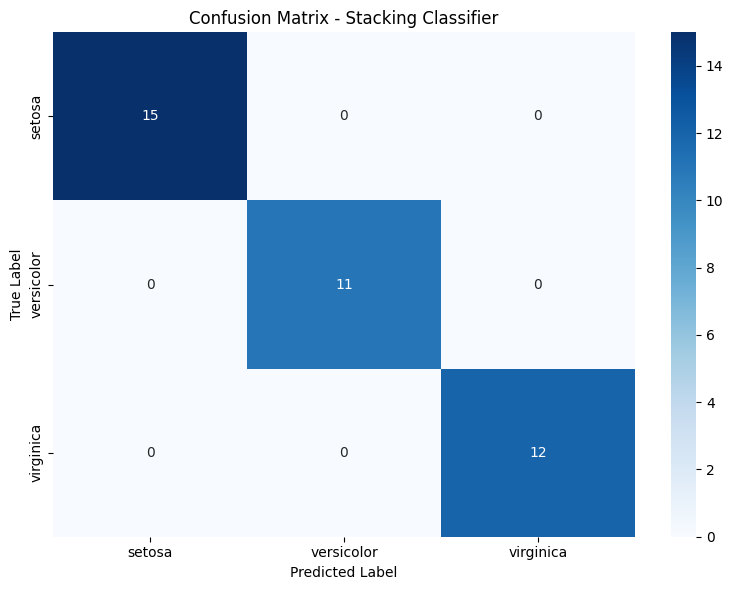

In [26]:
# Create a stacking classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('svm', svm_grid.best_estimator_),
        ('knn', knn_grid.best_estimator_),
        ('dt', dt_grid.best_estimator_)
    ],
    final_estimator=LogisticRegression(random_state=42)
)

# Fit the model
stacking_clf.fit(X_train, y_train)

# Evaluate the model
stacking_accuracy, stacking_preds = evaluate_model(
    stacking_clf, X_test, y_test, "Stacking Classifier"
)

# Store results
results['Stacking'] = stacking_accuracy

# Comparing all models

                     Accuracy
SVM                  1.000000
KNN                  1.000000
Logistic Regression  1.000000
Decision Tree        1.000000
Random Forest        1.000000
Bagging              1.000000
AdaBoost             1.000000
Voting               1.000000
Gradient Boosting    1.000000
Stacking             1.000000
K-Means              0.842105


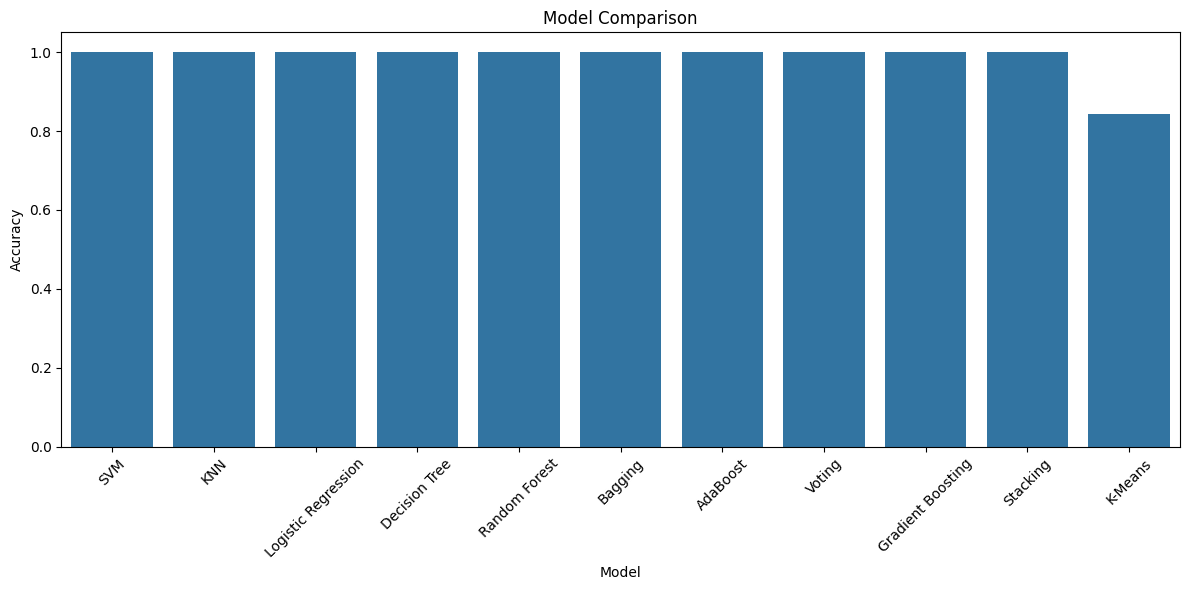


Best performing model: SVM with accuracy 1.0000


In [27]:
# Create a DataFrame with results
results_df = pd.DataFrame({
    'Accuracy': results
}).sort_values('Accuracy', ascending=False)

# Display results
print(results_df)

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y='Accuracy', data=results_df)
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print best model
best_model = results_df.index[0]
print(f"\nBest performing model: {best_model} with accuracy {results_df['Accuracy'].max():.4f}")

# NOTE

Apply LGBM, XGBoost, CatBoost, and check the same data set by running pycaret and comparing the model accuracy score. Use a huge categorical dataset.

Dataset - UCI Adult Income dataset. (predict the income based on demographics)